In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing

When dealing with images & convolutions, it is paramount to handle `image_data_format` properly

In [4]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

We'll preprocess by scaling images pixels to be between 0 and 1.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
print(x_train.shape, y_train.shape,
      x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
# Converting the classes to its binary categorical form.
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [8]:
print(x_train.shape, y_train.shape,
      x_test.shape, y_test.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


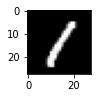

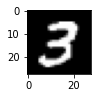

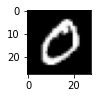

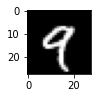

In [15]:
for i in [3,7,1,4]:  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

# A Simple CNN

In [8]:
# initializing the values for the convolution neural network

nb_epoch = 100

batch_size = 64 

nb_filters = 32 # number of convolutional filters to use

nb_pool = 2 # size of pooling area for max pooling

nb_conv = 3 # convolution kernel size

sgd = SGD()

#### Step 1: Model Definition

In [9]:
model = Sequential()
# the very first layer must always specify the input_shape
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))  
model.add(Activation('sigmoid'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

#### Step 2: Compile

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [11]:
run_hist = model.fit(x_train, y_train,
                     batch_size=batch_size, 
                     epochs=nb_epoch, verbose=1, 
                     validation_data=(x_test, y_test))

Epoch 1/100
938/938 [==============================] - 8s 6ms/step - loss: 3.6653 - accuracy: 0.5310 - val_loss: 0.6634 - val_accuracy: 0.7661
Epoch 2/100
938/938 [==============================] - 5s 5ms/step - loss: 0.4787 - accuracy: 0.8540 - val_loss: 0.4330 - val_accuracy: 0.8670
Epoch 3/100
938/938 [==============================] - 5s 5ms/step - loss: 0.3964 - accuracy: 0.8806 - val_loss: 0.3614 - val_accuracy: 0.8932
Epoch 4/100
938/938 [==============================] - 5s 6ms/step - loss: 0.3681 - accuracy: 0.8893 - val_loss: 0.3965 - val_accuracy: 0.8770
Epoch 5/100
938/938 [==============================] - 6s 6ms/step - loss: 0.3514 - accuracy: 0.8950 - val_loss: 0.3378 - val_accuracy: 0.9011
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 0.3407 - accuracy: 0.8991 - val_loss: 0.3277 - val_accuracy: 0.9047
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 0.3323 - accuracy: 0.9008 - val_loss: 0.3420 - val_accuracy: 0.9004

#### Step 4: Evaluate

In [12]:
run_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training accuracy and the validation accuracy over the different epochs and see how it looks.

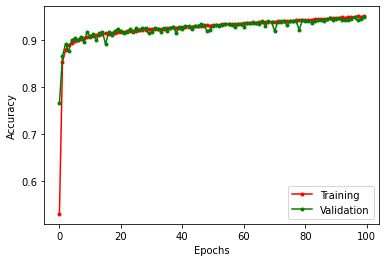

In [13]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["accuracy"],'r',
        marker='.', label="Training")
ax.plot(run_hist.history["val_accuracy"],'g',
        marker='.', label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax.legend()

In [14]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'accuracy']


In [15]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.18352389335632324
Test Accuracy: 0.9498000144958496


# Adding More Dense Layers

In [16]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid',
                 input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

run_hist = model.fit(x_train, y_train,
                     batch_size=batch_size, 
                     epochs=nb_epoch,verbose=1,
                     validation_data=(x_test, y_test))

Epoch 1/100
938/938 [==============================] - 10s 10ms/step - loss: 0.4739 - accuracy: 0.8760 - val_loss: 0.2593 - val_accuracy: 0.9245
Epoch 2/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2329 - accuracy: 0.9319 - val_loss: 0.1936 - val_accuracy: 0.9423
Epoch 3/100
938/938 [==============================] - 10s 11ms/step - loss: 0.1838 - accuracy: 0.9466 - val_loss: 0.1623 - val_accuracy: 0.9520
Epoch 4/100
938/938 [==============================] - 8s 9ms/step - loss: 0.1514 - accuracy: 0.9559 - val_loss: 0.1380 - val_accuracy: 0.9585
Epoch 5/100
938/938 [==============================] - 8s 9ms/step - loss: 0.1295 - accuracy: 0.9617 - val_loss: 0.1288 - val_accuracy: 0.9629
Epoch 6/100
938/938 [==============================] - 8s 9ms/step - loss: 0.1129 - accuracy: 0.9670 - val_loss: 0.1247 - val_accuracy: 0.9613
Epoch 7/100
938/938 [==============================] - 8s 8ms/step - loss: 0.1006 - accuracy: 0.9701 - val_loss: 0.1029 - val_accuracy: 

#### Evaluation

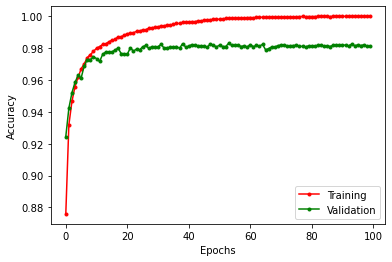

In [18]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["accuracy"],'r',
        marker='.', label="Training")
ax.plot(run_hist.history["val_accuracy"],'g',
        marker='.', label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax.legend()

In [19]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.08079393953084946
Test accuracy: 0.9812999963760376


# Adding Dropout Layer

In [20]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

run_hist = model.fit(x_train, y_train,
                     batch_size=batch_size, 
                     epochs=nb_epoch,verbose=1,
                     validation_data=(x_test, y_test))

Epoch 1/100
938/938 [==============================] - 8s 8ms/step - loss: 0.6284 - accuracy: 0.8213 - val_loss: 0.2582 - val_accuracy: 0.9272
Epoch 2/100
938/938 [==============================] - 8s 8ms/step - loss: 0.3163 - accuracy: 0.9082 - val_loss: 0.1887 - val_accuracy: 0.9444
Epoch 3/100
938/938 [==============================] - 7s 8ms/step - loss: 0.2625 - accuracy: 0.9236 - val_loss: 0.1550 - val_accuracy: 0.9530
Epoch 4/100
938/938 [==============================] - 7s 7ms/step - loss: 0.2321 - accuracy: 0.9314 - val_loss: 0.1376 - val_accuracy: 0.9579
Epoch 5/100
938/938 [==============================] - 7s 8ms/step - loss: 0.2101 - accuracy: 0.9388 - val_loss: 0.1224 - val_accuracy: 0.9636
Epoch 6/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1963 - accuracy: 0.9435 - val_loss: 0.1188 - val_accuracy: 0.9635
Epoch 7/100
938/938 [==============================] - 7s 8ms/step - loss: 0.1877 - accuracy: 0.9454 - val_loss: 0.1092 - val_accuracy: 0.9667

#### Evaluation

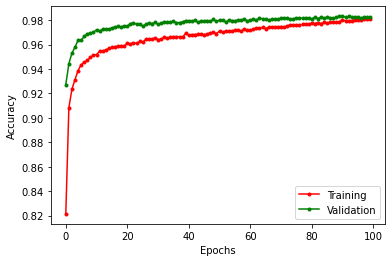

In [22]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["accuracy"],'r',
        marker='.', label="Training")
ax.plot(run_hist.history["val_accuracy"],'g',
        marker='.', label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax.legend()

In [23]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.0594780333340168
Test accuracy: 0.9825999736785889


# Adding More Convolutional Layers

In [24]:
model = Sequential()
model.add(Conv2D(nb_filters,
                 (nb_conv, nb_conv),
                 padding='valid',
                 input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters,
                 (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool,
                                  nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

run_hist = model.fit(x_train, y_train,
                     batch_size=batch_size, 
                     epochs=nb_epoch,verbose=1,
                     validation_data=(x_test, y_test))

Epoch 1/100
938/938 [==============================] - 10s 9ms/step - loss: 0.8245 - accuracy: 0.7316 - val_loss: 0.2523 - val_accuracy: 0.9271
Epoch 2/100
938/938 [==============================] - 9s 9ms/step - loss: 0.3910 - accuracy: 0.8810 - val_loss: 0.1953 - val_accuracy: 0.9434
Epoch 3/100
938/938 [==============================] - 9s 10ms/step - loss: 0.3256 - accuracy: 0.9007 - val_loss: 0.1672 - val_accuracy: 0.9498
Epoch 4/100
938/938 [==============================] - 9s 10ms/step - loss: 0.2889 - accuracy: 0.9123 - val_loss: 0.1454 - val_accuracy: 0.9566
Epoch 5/100
938/938 [==============================] - 9s 9ms/step - loss: 0.2580 - accuracy: 0.9208 - val_loss: 0.1271 - val_accuracy: 0.9615
Epoch 6/100
938/938 [==============================] - 9s 9ms/step - loss: 0.2347 - accuracy: 0.9304 - val_loss: 0.1201 - val_accuracy: 0.9648
Epoch 7/100
938/938 [==============================] - 9s 9ms/step - loss: 0.2155 - accuracy: 0.9348 - val_loss: 0.1065 - val_accuracy: 0.9

#### Evaluation

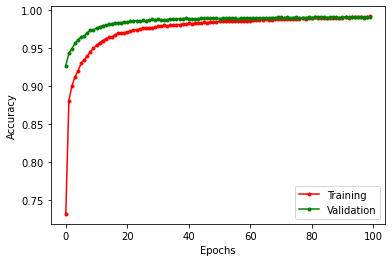

In [26]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["accuracy"],'r',
        marker='.', label="Training")
ax.plot(run_hist.history["val_accuracy"],'g',
        marker='.', label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax.legend()

In [27]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.028617434203624725
Test accuracy: 0.9911999702453613


#### Let's plot our model's classifications!

1/1 [==============================] - 0s 218ms/step


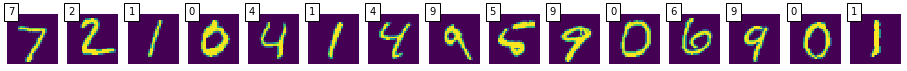

In [28]:
slice = 15
predicted = model.predict(x_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(x_test[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Summary

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [30]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t",
              layer.name, "\t\t", W.shape,
              "\t", b.shape)

Layer 0 	 conv2d_3 		 (3, 3, 1, 32) 	 (32,)
Layer 2 	 conv2d_4 		 (3, 3, 32, 32) 	 (32,)
Layer 7 	 dense_5 		 (4608, 128) 	 (128,)
Layer 10 	 dense_6 		 (128, 10) 	 (10,)
